In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [56]:
#reads the data and makes wine quality the first column in data frame
wine_df = pd.read_csv("./Data/wine_extracted.csv")
wine_df = wine_df[wine_df.columns[-2:].append(wine_df.columns[:-2])]

In [53]:
wine_df.head()

,quality,Wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Gets summary data for the dataframe size and attribute details

In [8]:
#gets no. of instances and attribtues
wine_df.shape

(6497, 13)

In [58]:
#gets the info of each attribute
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               6497 non-null   int64  
 1   Wine                  6497 non-null   object 
 2   fixed acidity         6497 non-null   float64
 3   volatile acidity      6497 non-null   float64
 4   citric acid           6497 non-null   float64
 5   residual sugar        6497 non-null   float64
 6   chlorides             6497 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6497 non-null   float64
 11  sulphates             6497 non-null   float64
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [59]:
#gets attributes mean, std, min ,max, quartiles
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
quality,6497.0,5.818378,0.873255,3.00000,5.00000,6.00000,6.00000,9.00000
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000


### Outliers

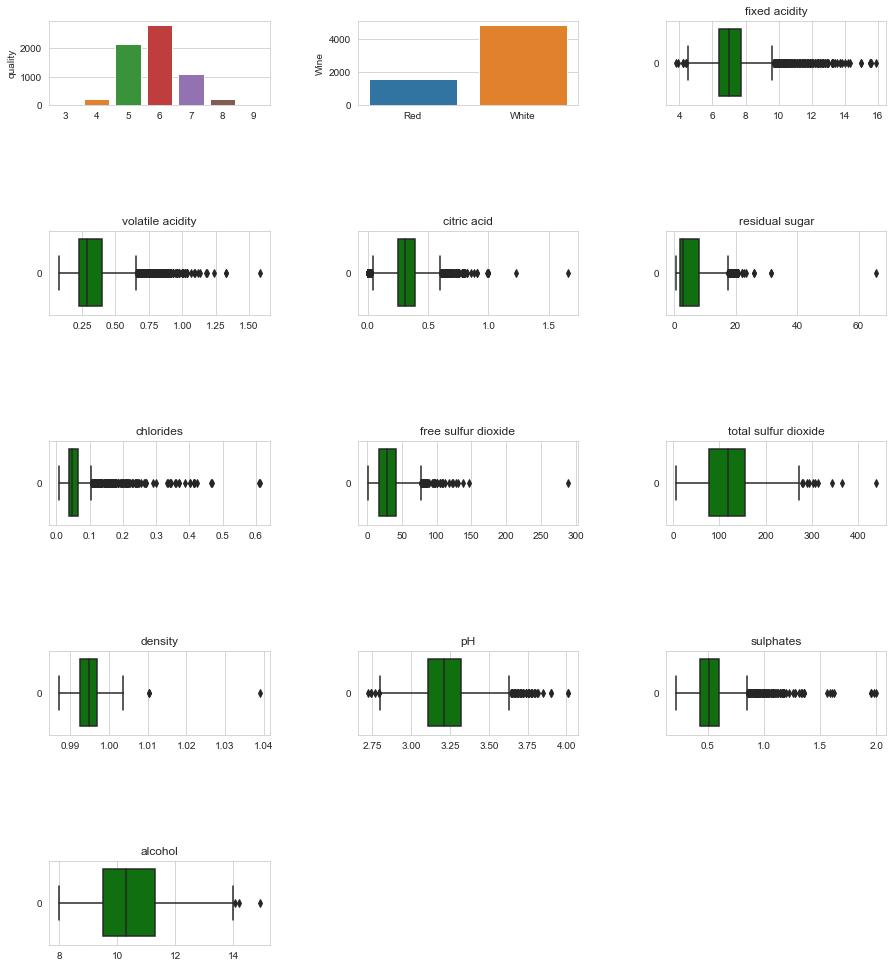

In [42]:
#gets the cols and sets figure size
cols = wine_df.columns
plt.figure(figsize=(15,25))

#goes through  all the columns and gets all the graphs
for i in range(len(cols)):
    
    #sets postion in the subplot
    plt.subplot(9,3,i+1)
    sns.set_style('whitegrid')
    
    #creates bar chart for discrete data and box plots for continous data
    if i<2:
        sns.barplot(x=pd.unique(wine_df[cols[i]]), y=wine_df[cols[i]].value_counts(sort = False))
    else:
        sns.boxplot(data = wine_df[cols[i]],color='green',orient='h').set(title=cols[i])
        
#gets the space between the plots        
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
plt.show()

### Correlation: Pearson, Kendall or Spearman

Text(0.5, 1.0, 'Pearsons Correlation Matrix')

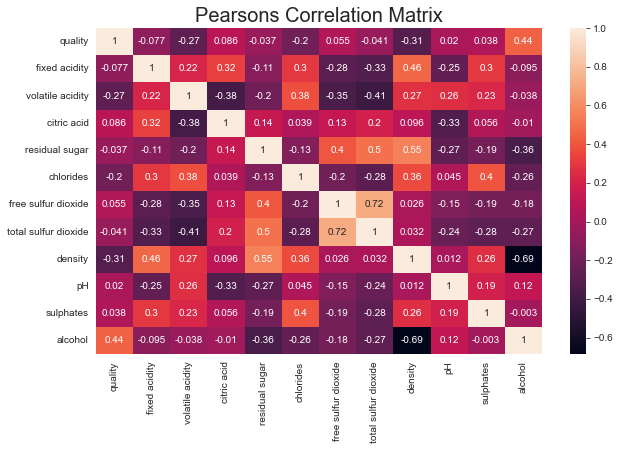

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_df.corr("pearson"), annot=True)
plt.title('Pearsons Correlation Matrix', fontsize=20)

Text(0.5, 1.0, 'Kendall Tau Correlation Matrix')

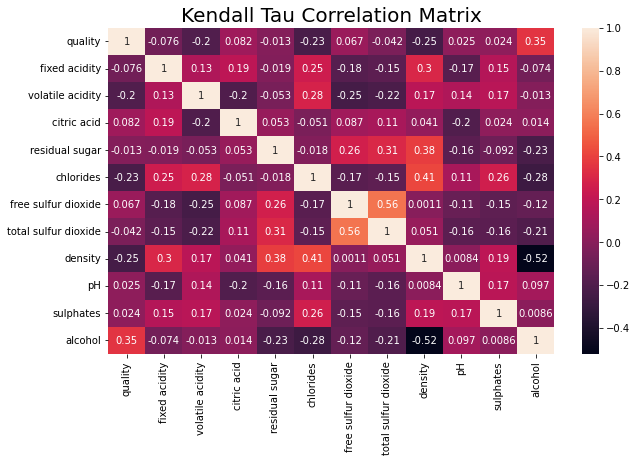

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_df.corr("kendall"), annot=True)
plt.title('Kendall Tau Correlation Matrix', fontsize=20)

Text(0.5, 1.0, 'Spearman Correlation Matrix')

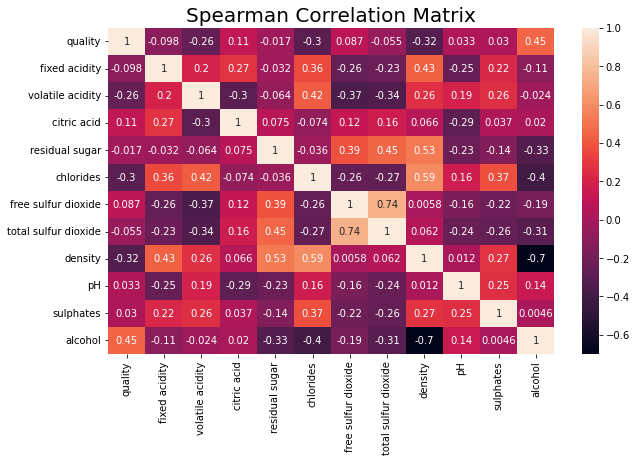

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_df.corr("spearman"), annot=True)
plt.title('Spearman Correlation Matrix', fontsize=20)

### Feature Importance

In [60]:
#changes the red wine to 1 and white wine to 0
wine_df.loc[wine_df["Wine"]=="Red", "Wine" ] = 1
wine_df.loc[wine_df["Wine"]=="White", "Wine" ] = 0
pd.unique(wine_df["Wine"])

array([1, 0], dtype=object)

In [87]:
#2 models to find the importance of the features
model = RandomForestClassifier()
model = model.fit(wine_df[cols[1:]],wine_df["quality"])

model2 = AdaBoostClassifier()
model2 = model2.fit(wine_df[cols[1:]],wine_df["quality"])


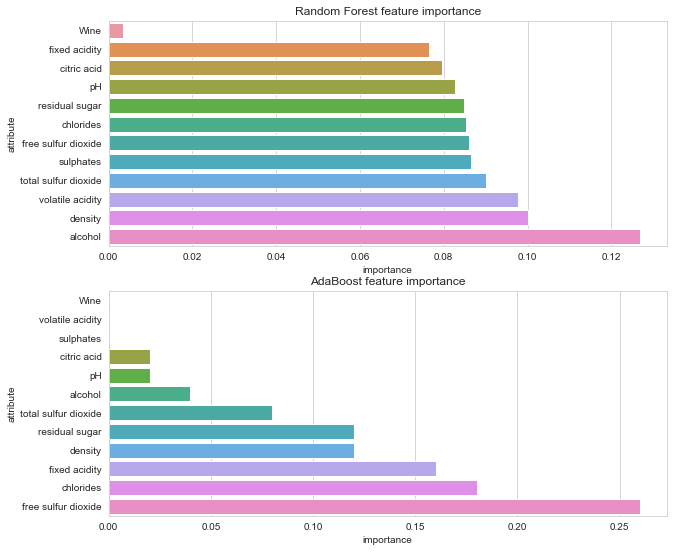

In [97]:
#plots the importance of the features 
importance_df = pd.DataFrame(data = {"attribute":cols[1:], "importance":model.feature_importances_}).sort_values(by = ["importance"])
importance_df2 = pd.DataFrame(data = {"attribute":cols[1:], "importance":model2.feature_importances_}).sort_values(by = ["importance"])
plt.figure(figsize=(10,24))

plt.subplot(5,1,1)
sns.barplot(x = importance_df["importance"], y= importance_df["attribute"],orient='h').set(title = "Random Forest feature importance")
plt.subplot(5,1,2)
sns.barplot(x = importance_df2["importance"], y= importance_df2["attribute"],orient='h').set(title = "AdaBoost feature importance")
plt.show()